# St. Clair College of Applied Arts and Technology
# DAB-402 Capstone Project
## Title - Windsor House Rent Prediction
## Group 7
- Manoj Reddy Lenkala - 0753802
- Naveen Kumar Tedla - 0753623
- Sunil Kumar Vidam - 0735027

### Overview of Regression
 - Libraries
 - Importing Data
 - EDA
     - Data Variable Types and Statistics
     - Checking and Handling Null Values
     - Checking and Handling Duplicate Values
     - Plots on Rent Column
 - Copy of Dataframe
 - Feature Engineering on Categorical Variables-Manually
 - Feature Engineering on Categorical Variables using Encoders
 - Splitting the data
 - Regression Models
     - Linear Regression
     - Random Forest Regressor
     - Decision Tree Regressor
     - LassoCV
     - Ridge
     - ElasticNetCV
     - SVR
     - Random Forest Regressor with Grid Search
 - Executing the models by passing manually encoded data
 - Executing the models by passing label encoded data
 - Executing the models by passing dummies encoded data

### Overview of Classification
- Eliminating the outliers using z-score
- Creating Target Variable Based on Rent Column
- Over Sampling
- Data Split
- Classification Models
    - Logistic Regression
    - KNN Classifier
    - SVC
    - Random Forest Classifier
    - Random Forest Classifer with Multiple Parameters
    - XGB Classifier
    - XBG Classifier with Multiple Parameters
- Classification Results

### Creating Pickle File
- Pickle File Creation
 

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data

In [2]:
df = pd.read_csv("dataset.csv")

### EDA

In [3]:
df.shape

(837, 26)

#### Data Variable Types and Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ad_Id                   837 non-null    object 
 1   House_Type              837 non-null    object 
 2   Bedrooms                837 non-null    object 
 3   Bathrooms               837 non-null    float64
 4   Hydro                   837 non-null    object 
 5   Heat                    837 non-null    object 
 6   Water                   837 non-null    object 
 7   Parking                 837 non-null    int64  
 8   Pet_Friendly            837 non-null    object 
 9   Air_Conditioning        837 non-null    object 
 10  Smoking                 837 non-null    object 
 11  Laundry                 837 non-null    object 
 12  Dishwasher              837 non-null    object 
 13  Fridge                  837 non-null    object 
 14  Furnished               837 non-null    ob

In [5]:
df.describe()

,Bathrooms,Parking,Size,Rent
count,837.000000,837.000000,692.000000,777.000000
mean,1.278375,1.029869,1050.575145,1396.526384
std,0.510229,0.963604,810.498563,451.836048
min,1.000000,0.000000,1.000000,65.000000
25%,1.000000,0.000000,700.000000,1075.000000
50%,1.000000,1.000000,1000.000000,1324.000000
75%,1.500000,1.000000,1234.000000,1700.000000
max,5.000000,3.000000,12345.000000,3000.000000


In [6]:
df.head()

,Ad_Id,House_Type,Bedrooms,Bathrooms,Hydro,Heat,Water,Parking,Pet_Friendly,Air_Conditioning,...,Pool,24_Hour_Security,Bicycle_Parking,Storage_Space,Elevator_in_Building,Personal_Outdoor_Space,Agreement,Region,Size,Rent
0,Ad ID 1480250241,House,4,2.0,Yes,Yes,Yes,2,Yes,Yes,...,Not Included,Not Included,Not Included,Not Included,Not Included,Yard,1 Year,Windsor University South Cameron,2000.0,535.0
1,Ad ID 1480253104,House,5+,2.0,Yes,Yes,Yes,2,Yes,Yes,...,Not Included,Not Included,Not Included,Not Included,Not Included,Yard,1 Year,Windsor University South Cameron,2000.0,535.0
2,Ad ID 1482582882,Apartment,1,1.0,Yes,Yes,Yes,0,Yes,No,...,Not Included,Not Included,Not Included,Not Included,Yes,Balcony,1 Year,Windsor City Centre NW Walkerville,1.0,1075.0
3,Ad ID 1483543244,Apartment,1,1.0,No,Yes,Yes,1,Limited,No,...,Not Included,Not Included,Not Included,Not Included,Not Included,Balcony,1 Year,Windsor East East Walkerville,600.0,995.0
4,Ad ID 1488927026,House,5+,2.0,No,No,No,0,No,No,...,Not Included,Not Included,Not Included,Not Included,Not Included,Yard,1 Year,Windsor University South Cameron,1500.0,1000.0


#### Checking and Handling Null Values

In [7]:
df.isnull().any()

Ad_Id                     False
House_Type                False
Bedrooms                  False
Bathrooms                 False
Hydro                     False
Heat                      False
Water                     False
Parking                   False
Pet_Friendly              False
Air_Conditioning          False
Smoking                   False
Laundry                   False
Dishwasher                False
Fridge                    False
Furnished                 False
Gym                       False
Pool                      False
24_Hour_Security          False
Bicycle_Parking           False
Storage_Space             False
Elevator_in_Building      False
Personal_Outdoor_Space    False
Agreement                 False
Region                    False
Size                       True
Rent                       True
dtype: bool

In [8]:
df.isnull().sum()

Ad_Id                       0
House_Type                  0
Bedrooms                    0
Bathrooms                   0
Hydro                       0
Heat                        0
Water                       0
Parking                     0
Pet_Friendly                0
Air_Conditioning            0
Smoking                     0
Laundry                     0
Dishwasher                  0
Fridge                      0
Furnished                   0
Gym                         0
Pool                        0
24_Hour_Security            0
Bicycle_Parking             0
Storage_Space               0
Elevator_in_Building        0
Personal_Outdoor_Space      0
Agreement                   0
Region                      0
Size                      145
Rent                       60
dtype: int64

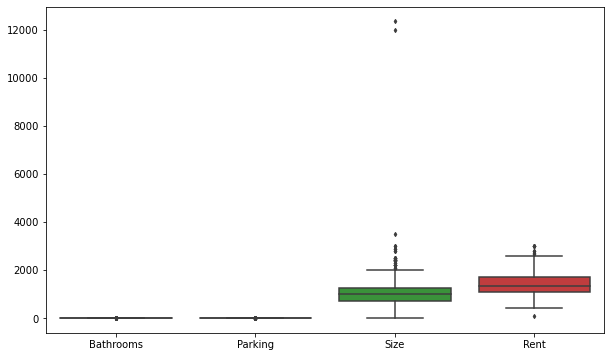

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,fliersize=3)

In [10]:
df.groupby(['House_Type','Bedrooms']).agg({'Rent':'mean','Size':'mean'}).round()

Rent    Size
House_Type     Bedrooms                       
Apartment      1                1070.0   656.0
               1 + Den          1175.0   733.0
               2                1259.0   820.0
               2 + Den          1450.0   925.0
               3                1466.0  1131.0
               4                1850.0  1400.0
               5+               1800.0     NaN
               Bachelor/Studio   831.0   493.0
Basement       1                1145.0   693.0
               1 + Den          1067.0   680.0
               2                1377.0  1240.0
               2 + Den          1412.0  1238.0
               3                1667.0  1367.0
               Bachelor/Studio   620.0   300.0
Condo          1                1479.0   671.0
               2                1900.0  1005.0
               2 + Den          1950.0   931.0
               Bachelor/Studio   893.0   446.0
Duplex/Triplex 1                1030.0   219.0
               1 + Den           927.0   525.0
               2                1343.0   798.0
               2 + Den          1454.0  1148.0
               3                1459.0   983.0
               3 + Den          1457.0   834.0
               4                1662.0  1112.0
               4 + Den          1900.0  1200.0
House          1                 742.0   632.0
               1 + Den           950.0   500.0
               2                1451.0   992.0
               2 + Den          1457.0   984.0
               3                1720.0  1440.0
               3 + Den          1869.0  1389.0
               4                1861.0  1980.0
               4 + Den          1938.0   734.0
               5+               1641.0  1774.0
               Bachelor/Studio  1200.0   350.0
Townhouse      2                1505.0  1093.0
               2 + Den          2400.0  1300.0
               3                2059.0  1068.0
               3 + Den          2050.0  1300.0
               4 + Den             NaN  1450.0
               5+               3000.0  2800.0

In [11]:
df['Size'] = df['Size'].apply(lambda x: np.nan if x<=100 or x>10000 else x)

In [12]:
# Ref: https://towardsdatascience.com/data-grouping-in-python-d64f1203f8d3

df['Average_Rent'] = df.groupby(['House_Type','Bedrooms','Bathrooms']).Rent.transform('mean').round()
df['Average_Size'] = df.groupby(['House_Type','Bedrooms','Bathrooms']).Size.transform('mean').round()
df['Average_Size_House_Type'] = df.groupby(['House_Type']).Size.transform('mean').round()

In [13]:
df['Rent'] = df['Rent'].fillna(df['Average_Rent'])
df['Rent'] = df['Rent'].fillna(df['Rent'].mean().round())
df['Size'] = df['Size'].fillna(df['Average_Size'])
df['Size'] = df['Size'].fillna(df['Average_Size_House_Type'])

In [14]:
df = df.drop(['Average_Rent', 'Average_Size', 'Average_Size_House_Type'], axis = 1)

In [15]:
df.isnull().any()

Ad_Id                     False
House_Type                False
Bedrooms                  False
Bathrooms                 False
Hydro                     False
Heat                      False
Water                     False
Parking                   False
Pet_Friendly              False
Air_Conditioning          False
Smoking                   False
Laundry                   False
Dishwasher                False
Fridge                    False
Furnished                 False
Gym                       False
Pool                      False
24_Hour_Security          False
Bicycle_Parking           False
Storage_Space             False
Elevator_in_Building      False
Personal_Outdoor_Space    False
Agreement                 False
Region                    False
Size                      False
Rent                      False
dtype: bool

#### Plots on Rent

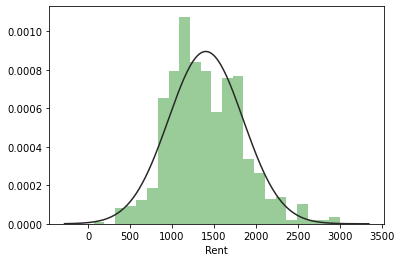

In [16]:
from scipy.stats import norm

ax = sns.distplot(df['Rent'], fit = norm, kde = False, color = 'g')

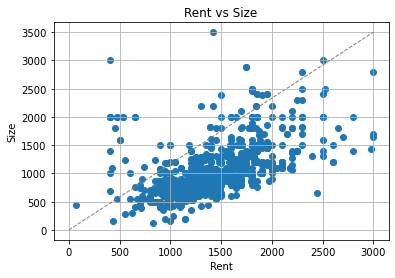

In [17]:
plt.scatter(df['Rent'], df['Size'])
plt.plot([0, max(df['Rent'])], [0, max(df['Size'])], color='gray', lw=1, linestyle='--')

plt.xlabel('Rent')
plt.ylabel('Size')
plt.title('Rent vs Size')
plt.grid()

plt.show()

In [18]:
df.groupby(['Region'])['Rent'].mean().sort_values()

Region
Windsor South Central West Walkerville Remington P    1241.736264
Windsor University South Cameron                      1334.358491
Windsor Riverside                                     1341.566038
Windsor City Centre NW Walkerville                    1354.349282
Windsor Sandwich Ojibway West Malden                  1370.639535
Windsor East East Walkerville                         1413.202703
Windsor West Forest Glade East Fontainbleu            1418.171429
Windsor South Walkerville West Fontainbleu Walker     1564.138889
Windsor South East Malden                             1569.529412
Windsor East Forest Glade                             1627.083333
Windsor Roseland                                      1860.357143
Windsor East Riverside                                2038.250000
Name: Rent, dtype: float64

In [19]:
df['Bathrooms'].value_counts()

1.0    605
2.0    156
1.5     50
3.0     16
2.5      8
5.0      2
Name: Bathrooms, dtype: int64

#### Checking and Handling Duplicate Values

In [20]:
df = df.drop(['Ad_Id'], axis = 1)

In [21]:
df.shape

(837, 25)

In [22]:
df.duplicated().sum() 

37

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(800, 25)

In [25]:
df = df.reset_index(drop=True)

### Copy of dataframe

In [26]:
data = df.copy()
df_1 = df.copy()
df_2 = df.copy()
df_class = df.copy()

In [27]:
df_2[['Bathrooms','Parking']] = df_2[['Bathrooms','Parking']].astype(str)

### Feature Engineering on Categorical Variables - Manual

In [28]:
data['House_Type'].value_counts()

Apartment         345
House             245
Duplex/Triplex     98
Condo              55
Basement           37
Townhouse          20
Name: House_Type, dtype: int64

In [29]:
HouseType_map = {'Basement': 1, 'House': 2, 'Duplex/Triplex': 3, 
               'Townhouse': 4, 'Apartment': 5, 'Condo': 6}
data['House_Type'] = data['House_Type'].map(HouseType_map)

In [30]:
data['Bedrooms'].value_counts()

2                  267
1                  187
3                  132
4                   52
5+                  43
Bachelor/Studio     41
2 + Den             30
3 + Den             28
1 + Den             14
4 + Den              6
Name: Bedrooms, dtype: int64

In [31]:
Bedrooms_map = {'Bachelor/Studio': 1, '1': 2, '1 + Den': 3, '2': 4,'2 + Den': 5,
               '3': 6, '3 + Den': 7, '4': 8,'4 + Den': 9,'5+': 10}
data['Bedrooms'] = data['Bedrooms'].map(Bedrooms_map)

In [32]:
No_Yes_map = {'No': 0, 'Yes': 1}
data['Hydro'] = data['Hydro'].map(No_Yes_map)
data['Heat'] = data['Heat'].map(No_Yes_map)
data['Water'] = data['Water'].map(No_Yes_map)
data['Furnished'] = data['Furnished'].map(No_Yes_map)

In [33]:
data['Pet_Friendly'].value_counts()

No         316
Limited    276
Yes        208
Name: Pet_Friendly, dtype: int64

In [34]:
Pet_Friendly_map = {'No': 0, 'Limited': 1,'Yes': 2}
data['Pet_Friendly'] = data['Pet_Friendly'].map(Pet_Friendly_map)

In [35]:
data['Air_Conditioning'].value_counts()

Yes              475
No               323
Not Available      2
Name: Air_Conditioning, dtype: int64

In [36]:
AC_map = {'No': 0, 'Not Available': 0,'Yes': 1}
data['Air_Conditioning'] = data['Air_Conditioning'].map(AC_map)

In [37]:
data['Smoking'].value_counts()

No               453
Outdoors only    295
Yes               52
Name: Smoking, dtype: int64

In [38]:
Smoking_map = {'No': 0, 'Outdoors only': 1,'Yes': 2}
data['Smoking'] = data['Smoking'].map(Smoking_map)

In [39]:
data['Laundry'].value_counts()

Laundry (In Building)                     345
Laundry (In Unit)                         245
Laundry (In Unit)Laundry (In Building)    106
Not Included                              104
Name: Laundry, dtype: int64

In [40]:
data = pd.get_dummies(data, columns = ['Laundry'], 
                                    drop_first=True)

In [41]:
NotIncluded_Yes_map = {'Not Included': 0, 'Yes': 1}
data['Dishwasher'] = data['Dishwasher'].map(NotIncluded_Yes_map)
data['Fridge'] = data['Fridge'].map(NotIncluded_Yes_map)
data['Gym'] = data['Gym'].map(NotIncluded_Yes_map)
data['Pool'] = data['Pool'].map(NotIncluded_Yes_map)
data['24_Hour_Security'] = data['24_Hour_Security'].map(NotIncluded_Yes_map)
data['Elevator_in_Building'] = data['Elevator_in_Building'].map(NotIncluded_Yes_map)
data['Bicycle_Parking'] = data['Bicycle_Parking'].map(NotIncluded_Yes_map)
data['Storage_Space'] = data['Storage_Space'].map(NotIncluded_Yes_map)

In [42]:
data['Personal_Outdoor_Space'].value_counts()

Yard            357
Not Included    221
Balcony         200
YardBalcony      22
Name: Personal_Outdoor_Space, dtype: int64

In [43]:
data = pd.get_dummies(data, columns = ['Personal_Outdoor_Space'], 
                                    drop_first=True)

In [44]:
data['Agreement'].value_counts()

1 Year            732
Month-to-month     68
Name: Agreement, dtype: int64

In [45]:
Agreement_map = {'Month-to-month': 0, '1 Year': 1}
data['Agreement'] = data['Agreement'].map(Agreement_map)

In [46]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(data['Region'])
hashed_features = hashed_features.toarray()
hash=pd.DataFrame(hashed_features)

In [47]:
data=pd.concat([data, hash], join = 'outer', axis = 1)

In [48]:
data = data.drop(['Region'], axis=1)

In [49]:
data.head()

,House_Type,Bedrooms,Bathrooms,Hydro,Heat,Water,Parking,Pet_Friendly,Air_Conditioning,Smoking,...,Laundry_Not Included,Personal_Outdoor_Space_Not Included,Personal_Outdoor_Space_Yard,Personal_Outdoor_Space_YardBalcony,0,1,2,3,4,5
0,2,8,2.0,1,1,1,2,2,1,1,...,0,0,1,0,-4.0,9.0,3.0,-8.0,2.0,-2.0
1,2,10,2.0,1,1,1,2,2,1,0,...,0,0,1,0,-4.0,9.0,3.0,-8.0,2.0,-2.0
2,5,2,1.0,1,1,1,0,2,0,1,...,0,0,0,0,-2.0,9.0,5.0,-8.0,1.0,-3.0
3,5,2,1.0,0,1,1,1,1,0,1,...,0,0,0,0,-1.0,6.0,7.0,-5.0,0.0,-2.0
4,2,10,2.0,0,0,0,0,0,0,1,...,0,0,1,0,-4.0,9.0,3.0,-8.0,2.0,-2.0


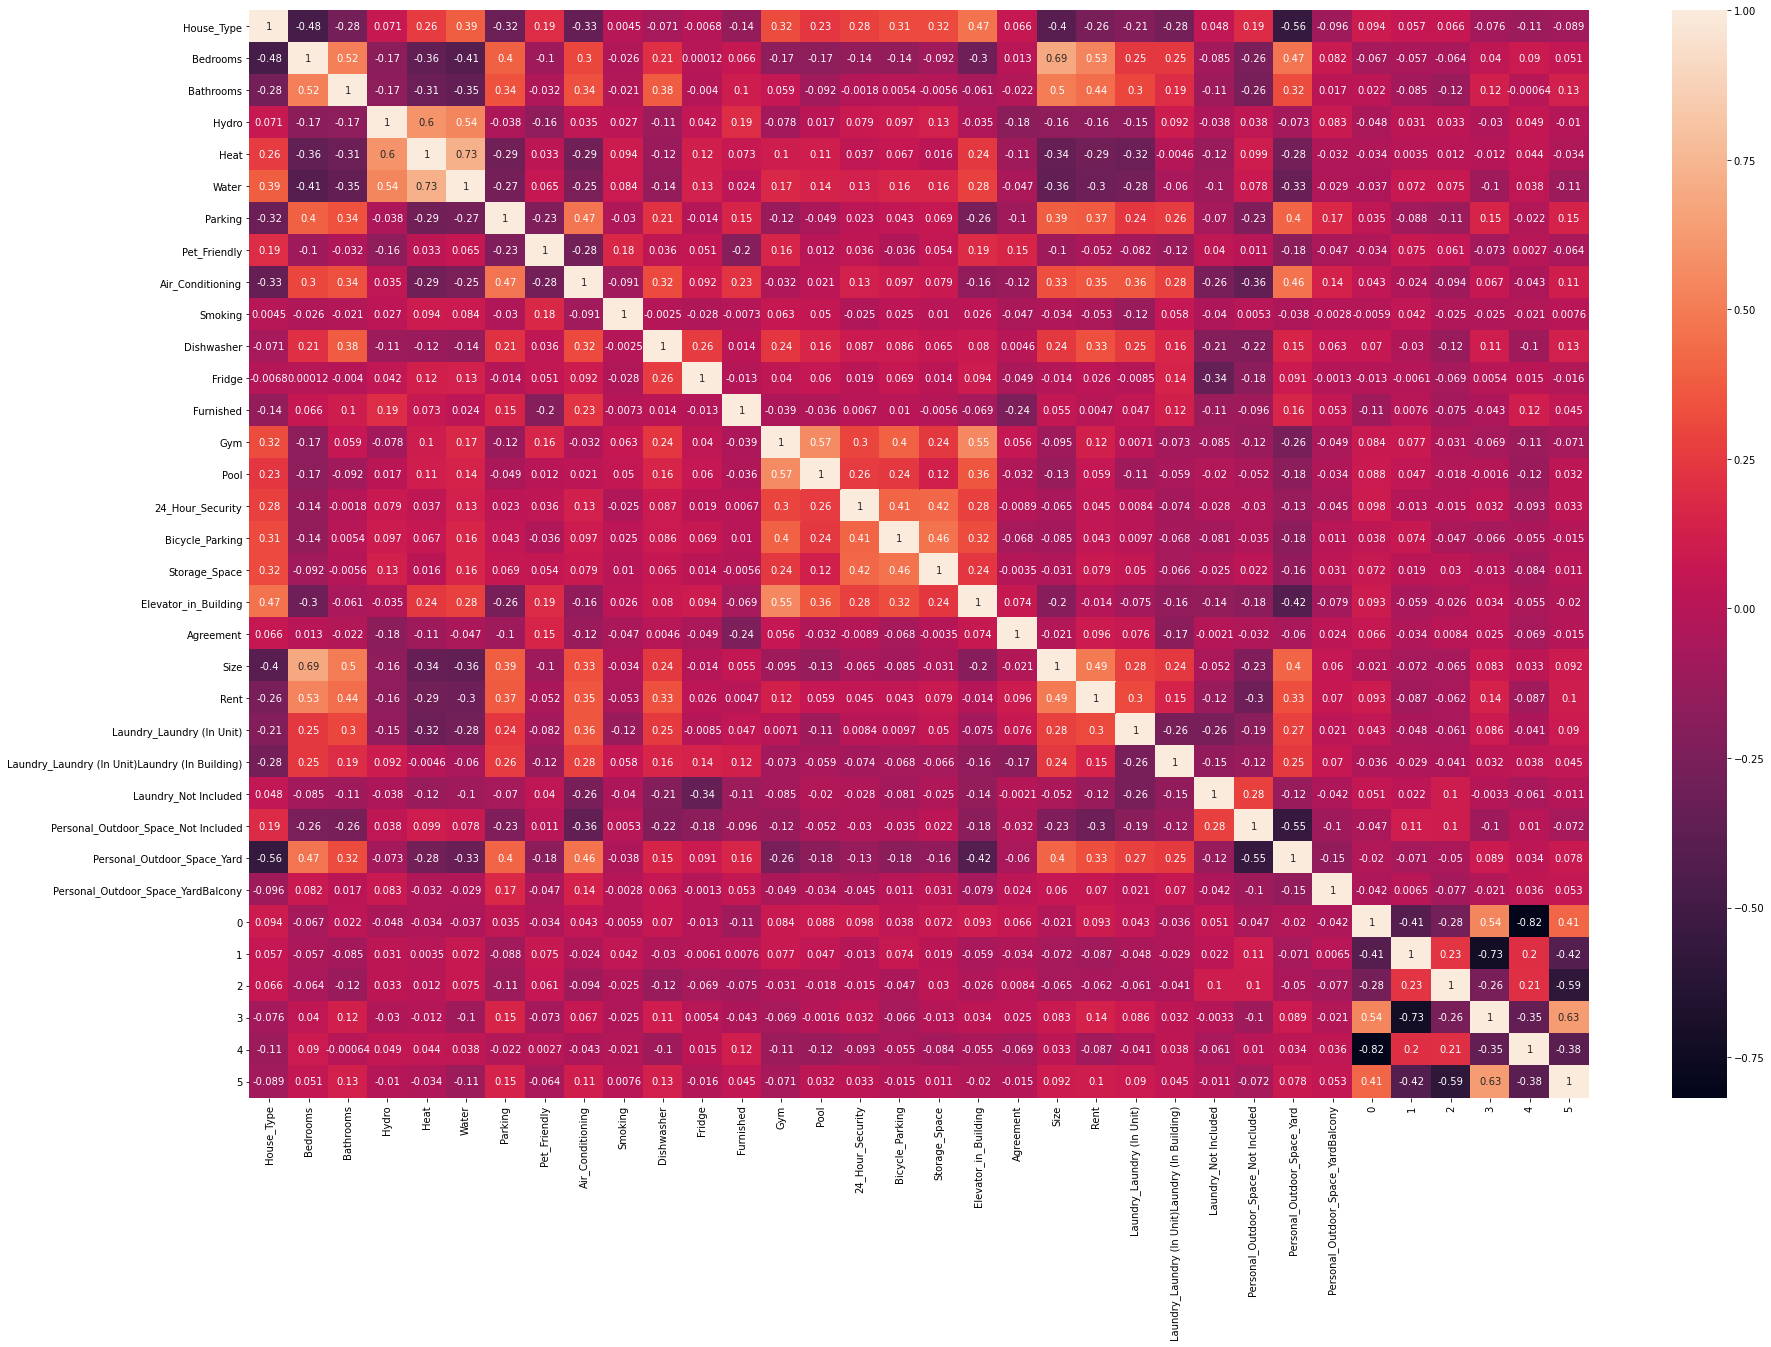

In [50]:
#Visualising the data using heatmap
corr = data.corr(method='kendall')
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)

#### Feature Engineering on Categorical Variables Using Encoders

In [51]:
from pandas.api.types import is_string_dtype, is_object_dtype
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

def encoder_label(df_1):
    for col in df_1.columns:
        if is_object_dtype(df_1[col]) or is_string_dtype(df_1[col]):
            df_1[col]= label_encoder.fit_transform(df_1[col])
    
    return df_1

In [52]:
def encoder_dummies(df_2):
    for col in df_2.columns:
        if is_object_dtype(df_2[col]) or is_string_dtype(df_2[col]):
            
            df_2 = pd.concat([df_2,pd.get_dummies(df_2[col], prefix= col)],axis=1)
            df_2.drop([col], axis = 1, inplace =True)
    return df_2

In [53]:
df_1 = encoder_label(df_1)

In [54]:
df_2 = encoder_dummies(df_2)

In [55]:
df_1.head()

,House_Type,Bedrooms,Bathrooms,Hydro,Heat,Water,Parking,Pet_Friendly,Air_Conditioning,Smoking,...,Pool,24_Hour_Security,Bicycle_Parking,Storage_Space,Elevator_in_Building,Personal_Outdoor_Space,Agreement,Region,Size,Rent
0,4,6,2.0,1,1,1,2,2,2,1,...,0,0,0,0,0,2,0,10,2000.0,535.0
1,4,8,2.0,1,1,1,2,2,2,0,...,0,0,0,0,0,2,0,10,2000.0,535.0
2,0,0,1.0,1,1,1,0,2,0,1,...,0,0,0,0,1,0,0,0,683.0,1075.0
3,0,0,1.0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,1,600.0,995.0
4,4,8,2.0,0,0,0,0,1,0,1,...,0,0,0,0,0,2,0,10,1500.0,1000.0


In [56]:
df_2.head()

,Size,Rent,House_Type_Apartment,House_Type_Basement,House_Type_Condo,House_Type_Duplex/Triplex,House_Type_House,House_Type_Townhouse,Bedrooms_1,Bedrooms_1 + Den,...,Region_Windsor East Forest Glade,Region_Windsor East Riverside,Region_Windsor Riverside,Region_Windsor Roseland,Region_Windsor Sandwich Ojibway West Malden,Region_Windsor South Central West Walkerville Remington P,Region_Windsor South East Malden,Region_Windsor South Walkerville West Fontainbleu Walker,Region_Windsor University South Cameron,Region_Windsor West Forest Glade East Fontainbleu
0,2000.0,535.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2000.0,535.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,683.0,1075.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,600.0,995.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1500.0,1000.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting the data

In [57]:
def drop_rent(data_frame):
    
    X = data_frame.drop(['Rent'],1)
    y = data_frame['Rent']
    
    return X,y

In [58]:
from sklearn.model_selection import train_test_split

def split(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    
    return X_train, X_test, y_train, y_test

In [59]:
# Scaling the data by using MinMaxScaler and fitting the train data
from sklearn.preprocessing import MinMaxScaler

def scaler_min_max(X_train,X_test):
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    # Scaling X_train and X_test using MinMaxScaler 
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

### Regression Models

#### Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def model_lr(X_train_scaled, X_test_scaled, y_train, y_test):
    
    regressor = LinearRegression()
    regressor.fit(X_train_scaled,y_train)
    y_pred = regressor.predict(X_test_scaled)
    R2_LR = metrics.r2_score(y_test, y_pred)*100
    
    return R2_LR
    

#### Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

def model_rf(X_train_scaled, X_test_scaled, y_train, y_test):
    
    RF_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
    RF_regressor.fit(X_train_scaled, y_train)
    y_pred = RF_regressor.predict(X_test_scaled)
    R2_RFR = metrics.r2_score(y_test, y_pred)*100
    
    return R2_RFR

#### DecisionTreeRegressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

def model_dt(X_train_scaled, X_test_scaled, y_train, y_test):
    
    DT_regressor = DecisionTreeRegressor(random_state=0)
    DT_regressor.fit(X_train_scaled, y_train)
    y_pred = DT_regressor.predict(X_test_scaled)
    R2_DTR = metrics.r2_score(y_test, y_pred)*100
    
    return R2_DTR

#### LassoCV

In [63]:
from sklearn.linear_model import LassoCV

def model_lasso(X_train_scaled, X_test_scaled, y_train, y_test):
    
    ls_regressor = LassoCV()
    ls_regressor.fit(X_train_scaled, y_train)
    y_pred = ls_regressor.predict(X_test_scaled)
    R2_LSCV = metrics.r2_score(y_test, y_pred)*100
    
    return R2_LSCV

#### Ridge

In [64]:
from sklearn.linear_model import Ridge

def model_ridge(X_train_scaled, X_test_scaled, y_train, y_test):
    
    Ridge_regressor = Ridge()
    Ridge_regressor.fit(X_train_scaled, y_train)
    y_pred = Ridge_regressor.predict(X_test_scaled)
    R2_RGE = metrics.r2_score(y_test, y_pred)*100
    
    return R2_RGE

#### ElasticNetCV

In [65]:
from sklearn.linear_model import ElasticNetCV

def model_elastic(X_train_scaled, X_test_scaled, y_train, y_test):
    
    Elastic_regressor = ElasticNetCV()
    Elastic_regressor.fit(X_train_scaled, y_train)
    y_pred = Elastic_regressor.predict(X_test_scaled)
    R2_ENCV = metrics.r2_score(y_test, y_pred)*100
    
    return R2_ENCV

#### SVR

In [66]:
from sklearn.svm import SVR

def model_svr(X_train_scaled, X_test_scaled, y_train, y_test):
    
    svr_regressor = SVR()
    svr_regressor.fit(X_train_scaled, y_train)  
    y_pred = svr_regressor.predict(X_test_scaled)
    R2_SVR = metrics.r2_score(y_test, y_pred)*100
    
    return R2_SVR

#### Random Forest Regressor with GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    #'bootstrap': [True],
    #'max_depth': [80, 90, 100, 110],
    #'max_features': [2, 3],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    #'n_estimators': [100, 200, 300, 1000]
    'max_depth':[5,10,15],
           'max_leaf_nodes':[30,40,50],
            'min_samples_split':[20,40,50]
}

def model_rf_param(X_train_scaled, X_test_scaled, y_train, y_test):
    
    # Create a based model
    rf = RandomForestRegressor()
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 5, n_jobs = -1, verbose = 2)
    # Fit the grid search to the data
    grid_search.fit(X_train_scaled, y_train)
    y_pred = grid_search.predict(X_test_scaled)
    R2_rf_param = metrics.r2_score(y_test, y_pred)*100
    
    return R2_rf_param

#### Executing the models by passing manually encoded data

In [68]:
X,y = drop_rent(data)

X_train, X_test, y_train, y_test = split(X,y)
X_train_scaled, X_test_scaled = scaler_min_max(X_train,X_test)

R2_lr_data = model_lr(X_train_scaled, X_test_scaled, y_train, y_test)

R2_rf_data = model_rf(X_train_scaled, X_test_scaled, y_train, y_test)

R2_dt_data = model_dt(X_train_scaled, X_test_scaled, y_train, y_test)

R2_lasso_data = model_lasso(X_train_scaled, X_test_scaled, y_train, y_test)

R2_ridge_data = model_ridge(X_train_scaled, X_test_scaled, y_train, y_test)

R2_elastic_data = model_elastic(X_train_scaled, X_test_scaled, y_train, y_test)

R2_svr_data = model_svr(X_train_scaled, X_test_scaled, y_train, y_test)

R2_rf_param_data = model_rf_param(X_train_scaled, X_test_scaled, y_train, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    8.2s finished


#### Executing the models by passing label encoded data

In [69]:
X,y = drop_rent(df_1)

X_train, X_test, y_train, y_test = split(X,y)
X_train_scaled, X_test_scaled = scaler_min_max(X_train,X_test)

R2_lr_df_1 = model_lr(X_train_scaled, X_test_scaled, y_train, y_test)

R2_rf_df_1 = model_rf(X_train_scaled, X_test_scaled, y_train, y_test)

R2_dt_df_1 = model_dt(X_train_scaled, X_test_scaled, y_train, y_test)

R2_lasso_df_1 = model_lasso(X_train_scaled, X_test_scaled, y_train, y_test)

R2_ridge_df_1 = model_ridge(X_train_scaled, X_test_scaled, y_train, y_test)

R2_elastic_df_1 = model_elastic(X_train_scaled, X_test_scaled, y_train, y_test)

R2_svr_df_1 = model_svr(X_train_scaled, X_test_scaled, y_train, y_test)

R2_rf_param_df_1 = model_rf_param(X_train_scaled, X_test_scaled, y_train, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    5.2s finished


#### Executing the models by passing dummies encoded data

In [70]:
X,y = drop_rent(df_2)

X_train, X_test, y_train, y_test = split(X,y)
X_train_scaled, X_test_scaled = scaler_min_max(X_train,X_test)

R2_lr_df_2 = model_lr(X_train_scaled, X_test_scaled, y_train, y_test)

R2_rf_df_2 = model_rf(X_train_scaled, X_test_scaled, y_train, y_test)

R2_dt_df_2 = model_dt(X_train_scaled, X_test_scaled, y_train, y_test)

R2_lasso_df_2 = model_lasso(X_train_scaled, X_test_scaled, y_train, y_test)

R2_ridge_df_2 = model_ridge(X_train_scaled, X_test_scaled, y_train, y_test)

R2_elastic_df_2 = model_elastic(X_train_scaled, X_test_scaled, y_train, y_test)

R2_svr_df_2 = model_svr(X_train_scaled, X_test_scaled, y_train, y_test)

R2_rf_param_df_2 = model_rf_param(X_train_scaled, X_test_scaled, y_train, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.3s finished


#### Regression Results

In [71]:

R2_new = {'Model':['Logistic Regression', 'Random Forest Regressor', 'Decicion Tree Regressor', 'Lasso', 
                   'Ridge', 'Elastic','SVR','Random Forest with best Parameters'],
          
          'Manual Encoding':[R2_lr_data, R2_rf_data, R2_dt_data, R2_lasso_data,
                              R2_ridge_data, R2_elastic_data, R2_svr_data, R2_rf_param_data],
          
          'Label Encoding':[R2_lr_df_1, R2_rf_df_1, R2_dt_df_1, R2_lasso_df_1,
                            R2_ridge_df_1, R2_elastic_df_1, R2_svr_df_1, R2_rf_param_df_1],
          
          'Dummies Encoding':[R2_lr_df_2, R2_rf_df_2, R2_dt_df_2, R2_lasso_df_2,
                            R2_ridge_df_2, R2_elastic_df_2, R2_svr_df_2, R2_rf_param_df_2]
         }
R2_df_new = pd.DataFrame(R2_new)
R2_df_new.sort_values(by = 'Label Encoding', ascending = False)

,Model,Manual Encoding,Label Encoding,Dummies Encoding
1,Random Forest Regressor,52.888320,53.011702,51.335859
7,Random Forest with best Parameters,50.247114,49.309961,45.975306
3,Lasso,44.222796,45.580505,46.460336
4,Ridge,43.212026,43.926188,45.243824
0,Logistic Regression,42.258322,43.854646,43.540567
5,Elastic,44.196194,42.523188,48.732900
2,Decicion Tree Regressor,14.016507,7.024788,9.411441
6,SVR,6.497880,6.915314,6.000616


### Classification

In [72]:
df_class.head()

,House_Type,Bedrooms,Bathrooms,Hydro,Heat,Water,Parking,Pet_Friendly,Air_Conditioning,Smoking,...,Pool,24_Hour_Security,Bicycle_Parking,Storage_Space,Elevator_in_Building,Personal_Outdoor_Space,Agreement,Region,Size,Rent
0,House,4,2.0,Yes,Yes,Yes,2,Yes,Yes,Outdoors only,...,Not Included,Not Included,Not Included,Not Included,Not Included,Yard,1 Year,Windsor University South Cameron,2000.0,535.0
1,House,5+,2.0,Yes,Yes,Yes,2,Yes,Yes,No,...,Not Included,Not Included,Not Included,Not Included,Not Included,Yard,1 Year,Windsor University South Cameron,2000.0,535.0
2,Apartment,1,1.0,Yes,Yes,Yes,0,Yes,No,Outdoors only,...,Not Included,Not Included,Not Included,Not Included,Yes,Balcony,1 Year,Windsor City Centre NW Walkerville,683.0,1075.0
3,Apartment,1,1.0,No,Yes,Yes,1,Limited,No,Outdoors only,...,Not Included,Not Included,Not Included,Not Included,Not Included,Balcony,1 Year,Windsor East East Walkerville,600.0,995.0
4,House,5+,2.0,No,No,No,0,No,No,Outdoors only,...,Not Included,Not Included,Not Included,Not Included,Not Included,Yard,1 Year,Windsor University South Cameron,1500.0,1000.0


In [73]:
df_class.shape

(800, 25)

In [74]:
df_class[['Bathrooms','Parking']] = df_class[['Bathrooms','Parking']].astype(str)

In [75]:
df_class.describe()

,Size,Rent
count,800.000000,800.000000
mean,1040.202500,1398.067500
std,461.598872,443.243151
min,130.000000,65.000000
25%,700.000000,1091.000000
50%,908.500000,1350.000000
75%,1200.000000,1700.000000
max,3500.000000,3000.000000


In [76]:
df_class.dtypes

House_Type                 object
Bedrooms                   object
Bathrooms                  object
Hydro                      object
Heat                       object
Water                      object
Parking                    object
Pet_Friendly               object
Air_Conditioning           object
Smoking                    object
Laundry                    object
Dishwasher                 object
Fridge                     object
Furnished                  object
Gym                        object
Pool                       object
24_Hour_Security           object
Bicycle_Parking            object
Storage_Space              object
Elevator_in_Building       object
Personal_Outdoor_Space     object
Agreement                  object
Region                     object
Size                      float64
Rent                      float64
dtype: object

#### Eliminating the outliers by using z-score

In [77]:
from scipy import stats

df_temp = df_class[(np.abs(stats.zscore(df_class['Rent'])) < 3)]
df_clean = df_temp[(np.abs(stats.zscore(df_temp['Size'])) < 3)]

In [78]:
df_clean.describe()

,Size,Rent
count,782.000000,782.000000
mean,1010.526854,1381.668798
std,407.913442,415.779223
min,130.000000,400.000000
25%,700.000000,1075.000000
50%,900.000000,1329.000000
75%,1200.000000,1695.000000
max,2400.000000,2700.000000


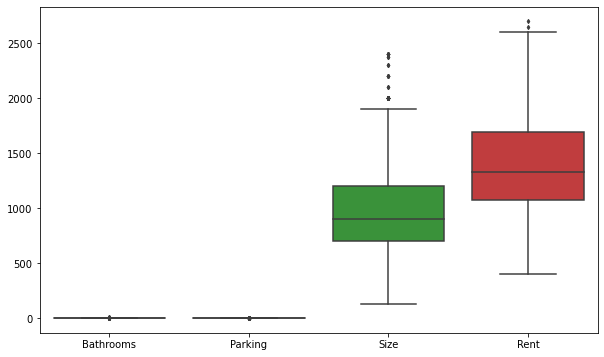

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean,fliersize=3)

In [80]:
df_clean.shape

(782, 25)

#### Creating Target Variable based on Rent column

In [81]:
conditions_Rent = [ (df_clean['Rent'] < 500 ),
              (df_clean['Rent'] >= 500) & (df_clean['Rent'] < 1000 ),
              (df_clean['Rent'] >= 1000 ) & (df_clean['Rent'] < 1500 ),
              (df_clean['Rent'] >= 1500 ) & (df_clean['Rent'] < 2000 ),
              (df_clean['Rent'] >= 2000 ) & (df_clean['Rent'] < 2500 ),
              (df_clean['Rent'] >= 2500 )   
]

In [82]:
conditions_Size = [ (df_clean['Size'] < 500 ),
              (df_clean['Size'] >= 500) & (df_clean['Size'] < 1000 ),
              (df_clean['Size'] >= 1000 ) & (df_clean['Size'] < 1500 ),
              (df_clean['Size'] >= 1500 ) & (df_clean['Size'] < 2000 ),
              (df_clean['Size'] >= 2000 ) & (df_clean['Size'] < 2500 ),
              (df_clean['Size'] >= 2500 )   
]

In [83]:
values_Rent = ['A','B','C','D','E','F']
values_Size = ['A','B','C','D','E','F']

In [84]:
df_clean['Rent_Category'] = np.select(conditions_Rent,values_Rent)
df_clean['Size_Category'] = np.select(conditions_Size,values_Size)

C:\Users\manoj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\manoj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
df_clean.head()

,House_Type,Bedrooms,Bathrooms,Hydro,Heat,Water,Parking,Pet_Friendly,Air_Conditioning,Smoking,...,Bicycle_Parking,Storage_Space,Elevator_in_Building,Personal_Outdoor_Space,Agreement,Region,Size,Rent,Rent_Category,Size_Category
0,House,4,2.0,Yes,Yes,Yes,2,Yes,Yes,Outdoors only,...,Not Included,Not Included,Not Included,Yard,1 Year,Windsor University South Cameron,2000.0,535.0,B,E
1,House,5+,2.0,Yes,Yes,Yes,2,Yes,Yes,No,...,Not Included,Not Included,Not Included,Yard,1 Year,Windsor University South Cameron,2000.0,535.0,B,E
2,Apartment,1,1.0,Yes,Yes,Yes,0,Yes,No,Outdoors only,...,Not Included,Not Included,Yes,Balcony,1 Year,Windsor City Centre NW Walkerville,683.0,1075.0,C,B
3,Apartment,1,1.0,No,Yes,Yes,1,Limited,No,Outdoors only,...,Not Included,Not Included,Not Included,Balcony,1 Year,Windsor East East Walkerville,600.0,995.0,B,B
4,House,5+,2.0,No,No,No,0,No,No,Outdoors only,...,Not Included,Not Included,Not Included,Yard,1 Year,Windsor University South Cameron,1500.0,1000.0,C,D


In [86]:
df_clean = df_clean.drop(['Size','Rent'],1)

In [87]:
df_clean['Rent_Category'].value_counts()

C    350
D    237
B    122
E     52
A     11
F     10
Name: Rent_Category, dtype: int64

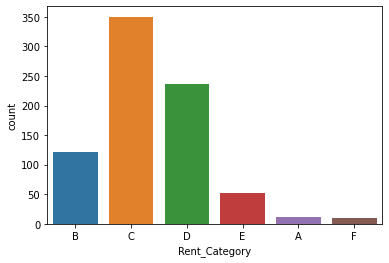

In [88]:
sns.countplot(df_clean['Rent_Category'])

In [89]:
df_clean = encoder_label(df_clean)

In [90]:
df_clean_new = df_clean[['House_Type', 'Bedrooms', 'Bathrooms', 'Parking', 'Pet_Friendly', 'Laundry', 'Personal_Outdoor_Space', 
                         'Region', 'Size_Category','Rent_Category']]

In [91]:
df_clean_new.head(2)

,House_Type,Bedrooms,Bathrooms,Parking,Pet_Friendly,Laundry,Personal_Outdoor_Space,Region,Size_Category,Rent_Category
0,4,6,2,2,2,2,2,10,4,1
1,4,8,2,2,2,2,2,10,4,1


In [92]:
X = df_clean_new.drop(["Rent_Category"],1)
y = df_clean_new["Rent_Category"]

#### Over Sampling

In [93]:
from imblearn.over_sampling import SMOTENC
from collections import Counter
over_sample = SMOTENC(random_state=0, categorical_features=True)
X,y = over_sample.fit_resample(X,y)
print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({1: 350, 2: 350, 3: 350, 4: 350, 0: 350, 5: 350})


#### Data Split

In [94]:
X_train, X_test, y_train, y_test = split(X,y)
X_train_scaled, X_test_scaled = scaler_min_max(X_train,X_test)

In [95]:
X_train_scaled

array([[0.8       , 0.66666667, 0.2       , ..., 0.33333333, 0.45454545,
        0.75      ],
       [0.8       , 0.55555556, 0.2       , ..., 0.66666667, 0.81818182,
        0.75      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.        , 0.22222222, 0.        , ..., 0.        , 0.09090909,
        0.25      ],
       [0.8       , 0.88888889, 0.        , ..., 0.33333333, 0.18181818,
        0.25      ],
       [0.8       , 0.66666667, 0.4       , ..., 0.33333333, 0.36363636,
        0.75      ]])

### Models
#### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting the model with train data
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_scaled, y_train)
lr_train_acc = classifier.score(X_train_scaled, y_train)*100
# Predicting the target
lr_pred = classifier.predict(X_test_scaled)
lr_acc = classifier.score(X_test_scaled, y_test)*100
#Evaluating the Results
print("Train Accuracy: %.4f" %classifier.score(X_train_scaled, y_train))
print("---Metrics---")
print("accuracy: %.4f" %accuracy_score(y_test, lr_pred))
#print("Precision: %.4f" %precision_score(y_test, lr_pred))
#print("Recall: %.4f" %recall_score(y_test, lr_pred))
#print("f1_Score: %.4f" %f1_score(y_test, lr_pred))


Train Accuracy: 0.5083
---Metrics---
accuracy: 0.4929


#### KNN Classifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

for k in range(13):
    k = k+1
    # Fitting the model with train data
    knn_clf = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn_clf.fit(X_train_scaled, y_train)
    # Evaluating and displaying training accuracy for the model
    knn_acc_train = knn_clf.score(X_train_scaled, y_train)*100
    print("Train accuracy:", knn_acc_train)
    # Predicting the target
    knn_pred = knn_clf.predict(X_test_scaled)
    #Evaluating the Results
    print("---Metrics--- for k = {}".format(k))
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, knn_pred)))
    print("---------------")

Train accuracy: 94.64285714285714
---Metrics--- for k = 1

Accuracy: 0.80

---------------
Train accuracy: 89.22619047619048
---Metrics--- for k = 2

Accuracy: 0.78

---------------
Train accuracy: 88.69047619047619
---Metrics--- for k = 3

Accuracy: 0.81

---------------
Train accuracy: 85.05952380952381
---Metrics--- for k = 4

Accuracy: 0.77

---------------
Train accuracy: 82.61904761904762
---Metrics--- for k = 5

Accuracy: 0.77

---------------
Train accuracy: 80.71428571428572
---Metrics--- for k = 6

Accuracy: 0.75

---------------
Train accuracy: 79.76190476190477
---Metrics--- for k = 7

Accuracy: 0.74

---------------
Train accuracy: 79.22619047619047
---Metrics--- for k = 8

Accuracy: 0.74

---------------
Train accuracy: 78.0952380952381
---Metrics--- for k = 9

Accuracy: 0.72

---------------
Train accuracy: 77.14285714285715
---Metrics--- for k = 10

Accuracy: 0.73

---------------
Train accuracy: 75.95238095238095
---Metrics--- for k = 11

Accuracy: 0.74

--------------

#### Support Vector Classfier

In [98]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting the model with train data
lnr_svm = SVC(kernel='linear',C=1)
lnr_svm.fit(X_train_scaled, y_train)

# Evaluating and displaying training accuracy for the model
svc_acc_train = lnr_svm.score(X_train_scaled, y_train)*100
print("Train accuracy:", svc_acc_train)

# Predicting the target
svm_pred = lnr_svm.predict(X_test_scaled)
svm_acc = lnr_svm.score(X_test_scaled, y_test)*100
#Evaluating the Results
print("---Metrics---")
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, svm_pred)))

Train accuracy: 55.773809523809526
---Metrics---

Accuracy: 0.55



#### Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting the model with train data
rfc = RandomForestClassifier(n_jobs=-1,random_state=0)
rfc.fit(X_train_scaled, y_train)

# Evaluating and displaying training accuracy for the model
rfc_acc_train = rfc.score(X_train_scaled, y_train)*100
print("Train accuracy:", rfc_acc_train)

# Predicting the target
rfc_pred = rfc.predict(X_test_scaled)
rf_acc = rfc.score(X_test_scaled, y_test)*100
#Evaluating the Results
print("---Metrics---")
print('\n Test Accuracy: {:.2f}\n'.format(accuracy_score(y_test, rfc_pred)))


Train accuracy: 97.02380952380952
---Metrics---

 Test Accuracy: 0.85



#### Random Forest Classifier with Multiple Parameters

In [100]:
# Create a hyper parameter grid to use in the GridSearch for a RandomForest:
param_grid={'max_depth':[5,10,15],'max_leaf_nodes':[30,40,50],'min_samples_split':[20,40,50]}

In [101]:
# Applying GridSearch on a RandomForestClassifier with a multiple parameter:
from sklearn.model_selection import GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(n_estimators=18,random_state=0,n_jobs=-1),param_grid,cv=5,return_train_score=True)
# Training the model with train data
grid_search_rf.fit(X_train,y_train)
# Evaluating and displaying training accuracy for the model
rfc_grid_acc_train = grid_search_rf.score(X_train, y_train)*100
print("Train accuracy:", rfc_grid_acc_train)
# Evaluating and displaying testing accuracy for the model
rf_bp_acc = grid_search_rf.score(X_test, y_test)*100 # Evaluate the model
print("Test score is "+str(grid_search_rf.score(X_test,y_test)*100))
print("Best parameters:"+str(grid_search_rf.best_params_))

Train accuracy: 81.07142857142857
Test score is 75.71428571428571
Best parameters:{'max_depth': 15, 'max_leaf_nodes': 50, 'min_samples_split': 20}


#### XGB Classifier

In [102]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Fitting the model with train data
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(X_train_scaled, y_train)

# Evaluating and displaying training accuracy for the model
xgb_acc_train = xgb.score(X_train_scaled, y_train)*100

print("Train accuracy:", xgb_acc_train)

# Predicting the target
xgb_pred = xgb.predict(X_test_scaled)
xgb_acc = xgb.score(X_test_scaled, y_test)*100
#Evaluating the Results
print("---Metrics---")
print('\n Test Accuracy: {:.2f}\n'.format(accuracy_score(y_test, rfc_pred)))

Train accuracy: 96.9047619047619
---Metrics---

 Test Accuracy: 0.85



#### XGB Classifier with Multiple Parameters

In [103]:
param_grid_xgb={'max_depth':[5,10,15],'min_child_weight':[1,2,3],'max_leaf_nodes':[30,40,50]}

In [104]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Building Model
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=0,n_jobs=-1),param_grid_xgb,cv=5,return_train_score=True,n_jobs=-1)

grid_search_xgb.fit(X_train_scaled,y_train) # Train the model
xgb_bp_test_acc = grid_search_xgb.score(X_train_scaled, y_train)*100
xgb_bp_pred = grid_search_xgb.predict(X_test_scaled) # Predicting the model
xgb_bp_acc = grid_search_xgb.score(X_test_scaled, y_test)*100 # Evaluate the model

print("Train accuracy:", grid_search_xgb.score(X_train_scaled, y_train)*100)
print("Test score is "+str(grid_search_xgb.score(X_test_scaled,y_test)*100))
print("Best parameters:"+str(grid_search_xgb.best_params_))

[20:06:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_leaf_nodes } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train accuracy: 97.02380952380952
Test score is 84.28571428571429
Best parameters:{'max_depth': 15, 'max_leaf_nodes': 30, 'min_child_weight': 1}


#### Classification Results

In [105]:

acc_new = {'Model':['Logistic Regression', 'SVM','Random Forest Classifier', 
                    'Random Forest with best Parameters','XGB','XGB with best parameters'],
           'Train_Accuracy':[lr_train_acc, svc_acc_train,rfc_acc_train, rfc_grid_acc_train, xgb_acc_train, xgb_bp_test_acc],
          
          'Test_Accuracy':[lr_acc,svm_acc,rf_acc,rf_bp_acc,xgb_acc,xgb_bp_acc]
          
         }
acc_df_new = pd.DataFrame(acc_new)
acc_df_new.sort_values(by = 'Test_Accuracy', ascending = False)

,Model,Train_Accuracy,Test_Accuracy
2,Random Forest Classifier,97.023810,84.523810
5,XGB with best parameters,97.023810,84.285714
4,XGB,96.904762,82.619048
3,Random Forest with best Parameters,81.071429,75.714286
1,SVM,55.773810,55.238095
0,Logistic Regression,50.833333,49.285714


### Creating Pickle File

In [106]:
# saving the model into pickle file
import pickle 
pickle_out = open("grid_search_rf.pkl", mode = "wb") 
pickle.dump(grid_search_rf, pickle_out) 
pickle_out.close()